# Task02 数据读取与数据分析

In [1]:
import os
print(os.getcwd())

C:\Users\13398\Documents\GitHub\datawhale\NLP


## 数据读取

In [2]:
import pandas as pd
train = pd.read_csv("./train_set.csv", sep='\t')

In [3]:
train

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
...,...,...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...


In [4]:
train.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...



- 赛题数据中，新闻的文本长度是多少？
- 赛题数据的类别分布是怎么样的，那些类别比较多？
- 赛题数据中，字符的分布是怎么样？

### 句子长度分析

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib as plt
%pylab inline
train['text_len'] = train['text'].apply(lambda x : len(x.split(' ')))
train.head(10)

Populating the interactive namespace from numpy and matplotlib


C:\Users\13398\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,label,text,text_len
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307
5,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...,1050
6,3,307 4780 6811 1580 7539 5886 5486 3433 6644 58...,267
7,10,26 4270 1866 5977 3523 3764 4464 3659 4853 517...,876
8,12,2708 2218 5915 4559 886 1241 4819 314 4261 166...,314
9,3,3654 531 1348 29 4553 6722 1474 5099 7541 307 ...,1086


In [7]:
train['text_len'].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

新闻平均句子的统计为907个字符，最短的句子长度为2，最长的为57921

## 根据句子长度绘制直方图

Text(0.5, 1.0, 'Histogram of char count')

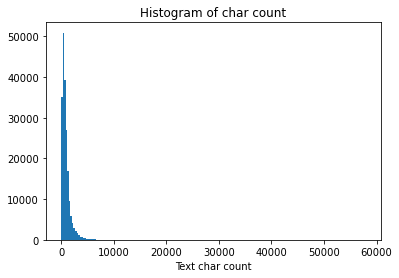

In [9]:
fig1 = plt.hist(train['text_len'], bins=200) # bins参数：直方个数
plt.xlabel('Text char count')
plt.title("Histogram of char count")

## 新闻类别分布

Text(0.5, 0, 'category')

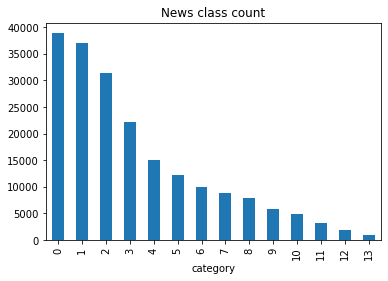

In [11]:
train['label'].value_counts().plot(kind='bar')
plt.title("News class count")
plt.xlabel("category")

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

类别分布不均匀， 科技最多，星座最少

## 字符分布统计

统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接，进而划分为字符，统计每个字符的个数。

In [12]:
from collections import Counter

In [13]:
all_lines = ' '.join(list(train['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

In [14]:
print(len(word_count))
print(word_count[0])
print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [ ]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])

print(word_count[2])

### 数据分析的结论

通过上述分析我们可以得出以下结论：

赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
赛题总共包括7000-8000个字符；
通过数据分析，我们还可以得出以下结论：

每个新闻平均字符个数较多，可能需要截断；

由于类别不均衡，会严重影响模型的精度；

## 作业

- 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
- 统计每类新闻中出现次数最多的字符？

1.多个分隔符来切分新闻

In [21]:
import re
train['text_sentence'] = train['text'].apply(lambda x : re.split('3075|900|648', x))

train['text_sentence_count'] = train['text_sentence'].apply(lambda x : int(len(x)))
print(train['text_sentence_count'].describe())

count    200000.000000
mean         43.391820
std          48.039958
min           1.000000
25%          15.000000
50%          30.000000
75%          55.000000
max        1867.000000
Name: text_sentence_count, dtype: float64


每篇新闻中平均有43个句子构成

In [ ]:
#统计每类新闻中出现次数对多的字符
from collections import Counter
category = {}
for i in range(len(train['label'])):   ##遍历所有内容，将字符按照label合并到一起 
    if train['label'][i] not in category:
        category[train['label'][i]] = train['text'][i]
    else:
        category[train['label'][i]] += ' '  #将字符加入该类别中 
        category[train['label'][i]] += train['text'][i]

category_count = {}
for key in category:
    word_count = Counter(category[key].split(' '))
    word_count = sorted(word_count.items(), key = lambda x:x[1], reverse = True)
    category_count[key] = word_count[0]
print(category_count)
